In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Загрузка тренировочных и тестовых данных
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#Вывод тренировочных данных
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
#Вывод тестовых данных
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
#Вывод информации о признаках, которые содержатся в датасете
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1. Предобработка данных

In [10]:
#Отбор признаков только с числовыми значениями
df_number = df_train.select_dtypes(exclude = 'object')

In [12]:
#Вывод коэффициентов корреляции между целевой переменной и всеми признаками
df_number.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<Axes: xlabel='SalePrice', ylabel='Count'>

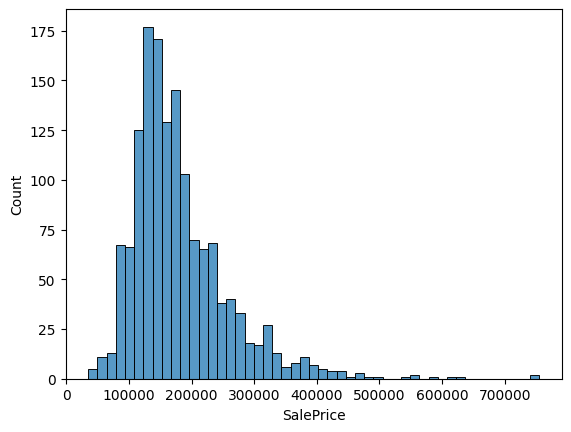

In [14]:
#Построение гистограммы для переменной SalePrice
sns.histplot(df_train["SalePrice"])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

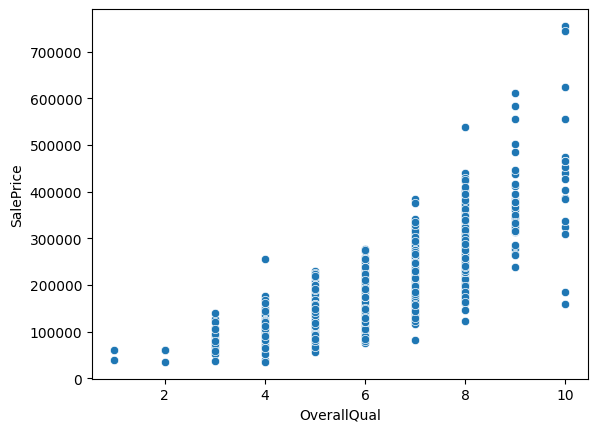

In [15]:
#Построение диаграммы рассеяния между переменными OverallQual и SalePrice
sns.scatterplot(x='OverallQual',y='SalePrice',data=df_train)

In [16]:
#Нахождение данных о домах, где оценка качества дома больше 8, а цена дома меньше 200000. Подозрение на наличие выброса
df_train[(df_train['OverallQual']>8) & (df_train['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

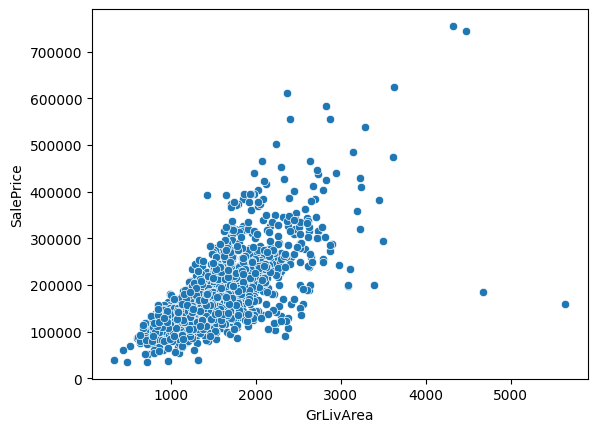

In [17]:
#Построение диаграммы рассеяния между переменными GrLivArea и SalePrice
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [18]:
#Нахождение данных о домах, где площадь дома больше 4000, а цена дома меньше 400000. Подозрение на наличие выброса
df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<400000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [20]:
#Поскольку по двум признакам id домов совпадают, то можно их удалить из тренировочного датасета
ind_drop = df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<400000)].index

In [21]:
#Удаление строк, которые являются выбросами из тренировочного набора данных
df_train = df_train.drop(ind_drop,axis=0)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

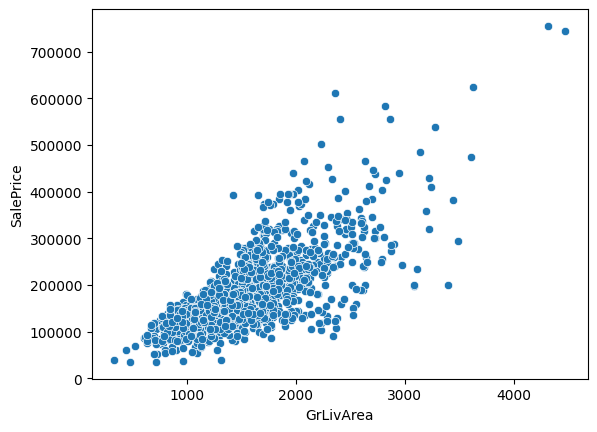

In [22]:
#Повторное построение диаграмм рассеяния. Убеждаемся, что этих домов нет в датасете
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

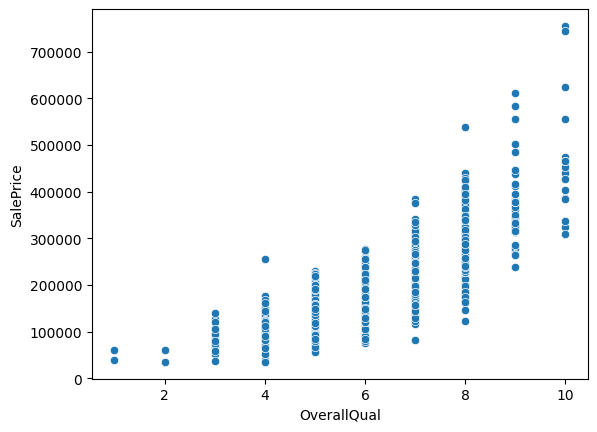

In [25]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df_train)

In [26]:
#Проверка на наличие пропущенных данных в тренировочных и тестовых данных
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [27]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [30]:
#Расчет процента пропущенных данных в каждой переменной
100* df_train.isnull().sum() / len(df_train)

Id                0.00000
MSSubClass        0.00000
MSZoning          0.00000
LotFrontage      17.76406
LotArea           0.00000
                   ...   
MoSold            0.00000
YrSold            0.00000
SaleType          0.00000
SaleCondition     0.00000
SalePrice         0.00000
Length: 81, dtype: float64

In [33]:
100* df_test.isnull().sum() / len(df_test)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [35]:
#Реализация функцци, для подсчета процента пропущенных значений для каждого признака
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [36]:
#Расчет процентов для тренировочных и тестовых данных
percent_nan = percent_missing(df_train)

In [37]:
percent_nan_test = percent_missing(df_test)

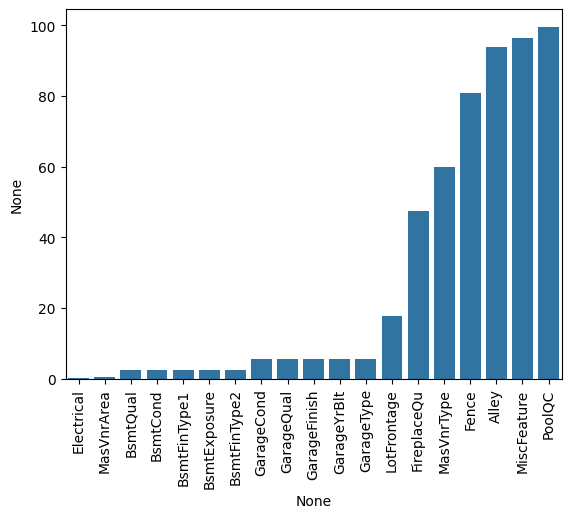

In [41]:
#Визуализация пропущеннных данных для каждого признака
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

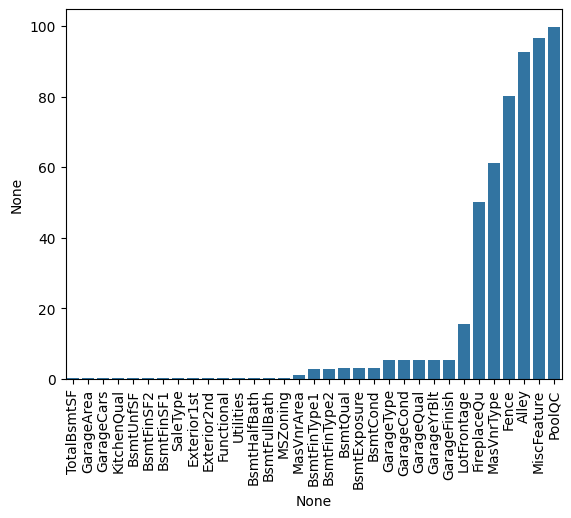

In [48]:
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

(0.0, 1.0)

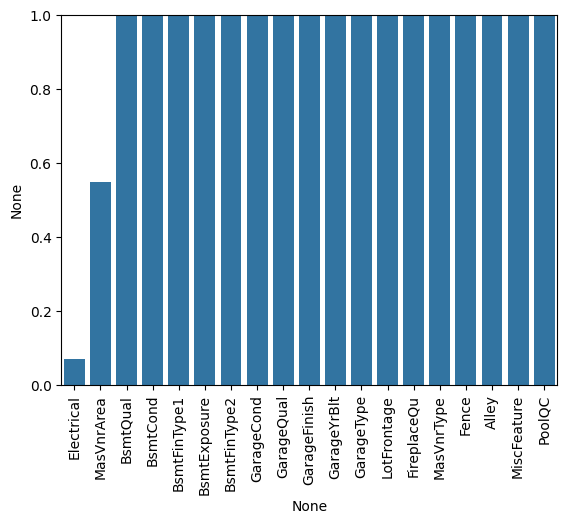

In [49]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

(0.0, 1.0)

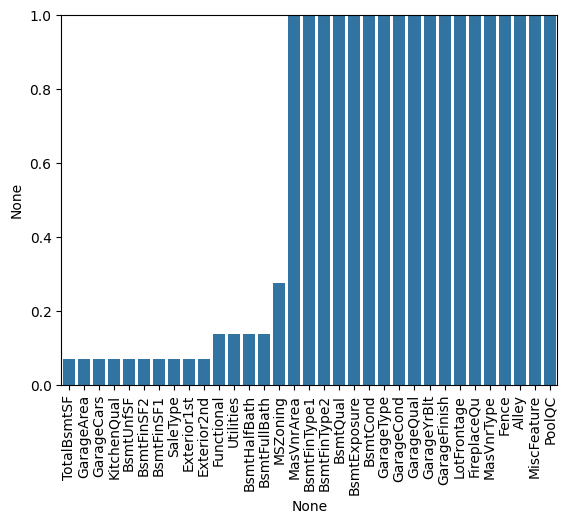

In [50]:
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [51]:
# Сначала рассматриваем те признаки, где процент пропущенных значений равна меньше 1%.Сравниваем с пороговым значением
percent_nan[percent_nan < 1]

Electrical    0.068587
MasVnrArea    0.548697
dtype: float64

In [52]:
percent_nan_test[percent_nan_test < 1]

TotalBsmtSF     0.06854
GarageArea      0.06854
GarageCars      0.06854
KitchenQual     0.06854
BsmtUnfSF       0.06854
BsmtFinSF2      0.06854
BsmtFinSF1      0.06854
SaleType        0.06854
Exterior1st     0.06854
Exterior2nd     0.06854
Functional      0.13708
Utilities       0.13708
BsmtHalfBath    0.13708
BsmtFullBath    0.13708
MSZoning        0.27416
dtype: float64

In [53]:
100/len(df_train)

0.06858710562414266

In [54]:
#Вывод информации о доме, где в столбце Electrical пропущенное значение
df_train[df_train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [56]:
#Аналогично для столбца MasVnrArea
df_train[df_train['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [57]:
#Удаление строки, где в столбце Electrical пропущенное значение
df_train = df_train.dropna(axis=0, subset=['Electrical'])

(0.0, 1.0)

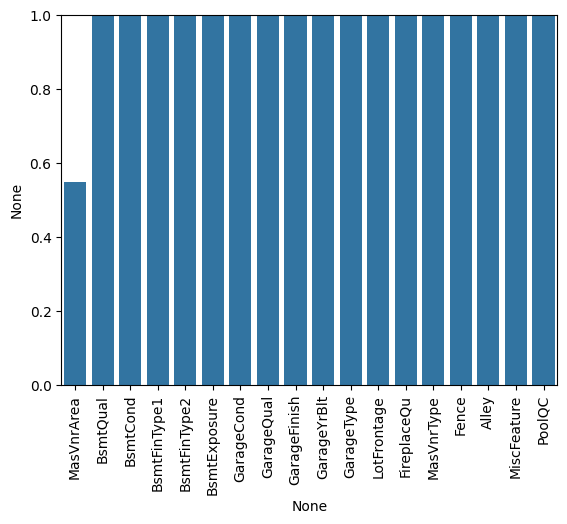

In [58]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [60]:
#Для пропущенных значений в столбце MasVnrArea устанавливаем значение 0
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

(0.0, 1.0)

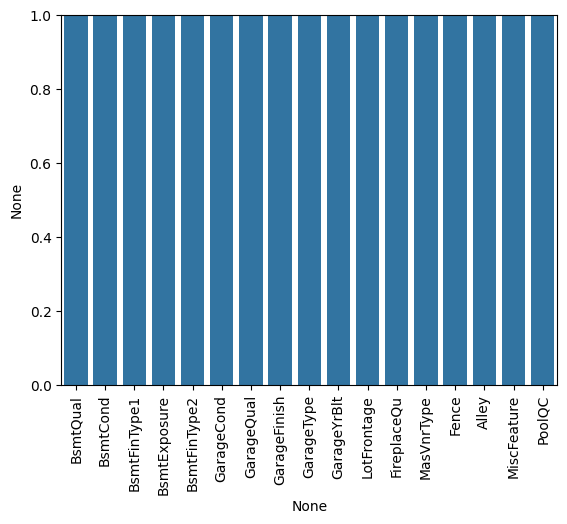

In [61]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

(0.0, 1.0)

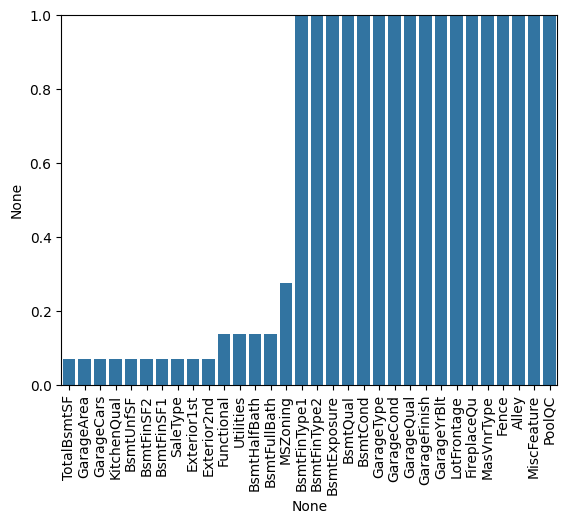

In [62]:
percent_nan_test = percent_missing(df_test)
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [63]:
#Вывод датафрейма со столбцами, связанными с гаражом
df_train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,RFn,TA,TA
1,Attchd,RFn,TA,TA
2,Attchd,RFn,TA,TA
3,Detchd,Unf,TA,TA
4,Attchd,RFn,TA,TA
...,...,...,...,...
1455,Attchd,RFn,TA,TA
1456,Attchd,Unf,TA,TA
1457,Attchd,RFn,TA,TA
1458,Attchd,Unf,TA,TA


In [65]:
#Устанавливаем в проаущенных значениях значение None, означающее, что у этих домов нет гаража
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_train[gar_str_cols] = df_train[gar_str_cols].fillna('None')
df_test[gar_str_cols] = df_test[gar_str_cols].fillna('None')

In [69]:
#Для числовых переменных указываем значение 0
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)

In [71]:
percent_nan = percent_missing(df_train)
percent_nan_test = percent_missing(df_test)

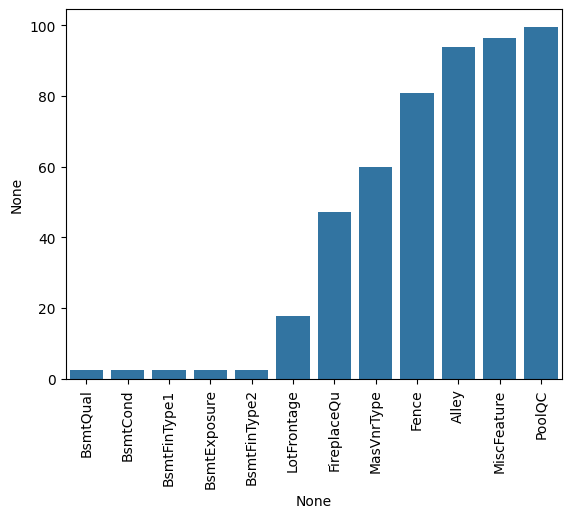

In [74]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

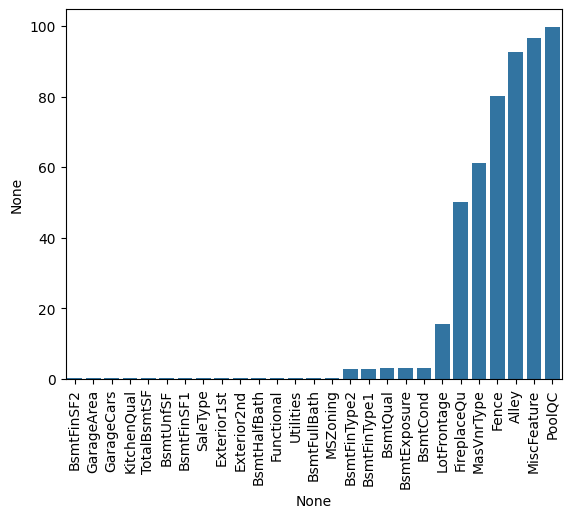

In [75]:
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

In [76]:
#Для домов, у которых не подвала, записываем значение None для всех столбцов, связанными с подвалом
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_train[bsmt_str_cols] = df_train[bsmt_str_cols].fillna('None')
df_test[bsmt_str_cols] = df_test[bsmt_str_cols].fillna('None')

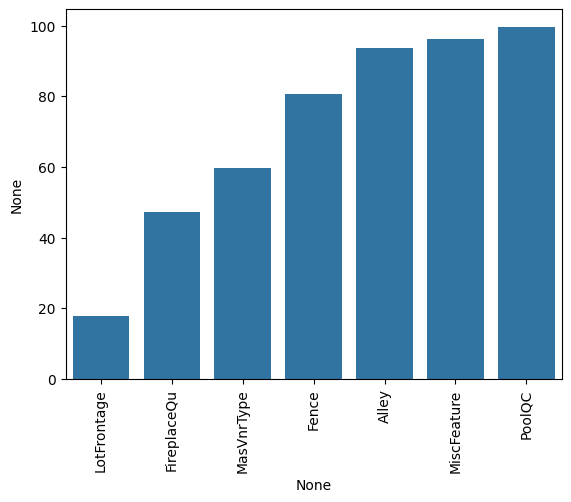

In [79]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

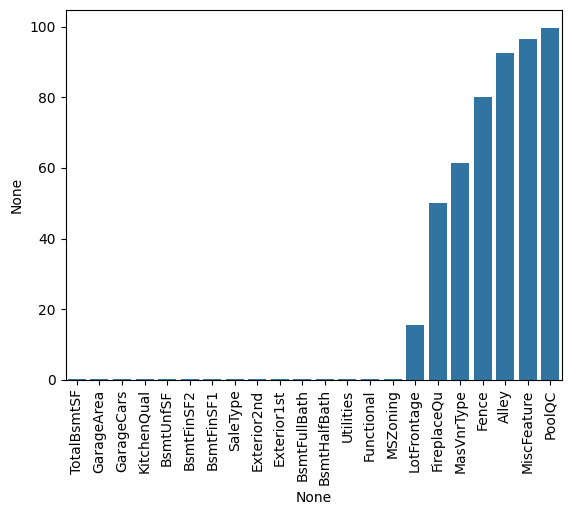

In [80]:
percent_nan_test = percent_missing(df_test)
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

In [81]:
#Для столбца MasVnrType, где есть пропущенное значение, указываем значение None
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")

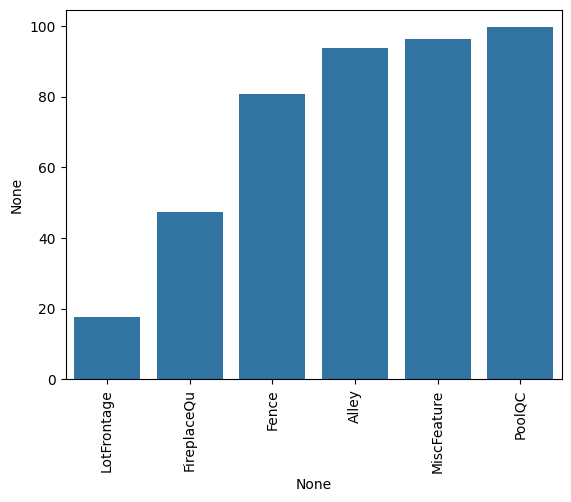

In [82]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

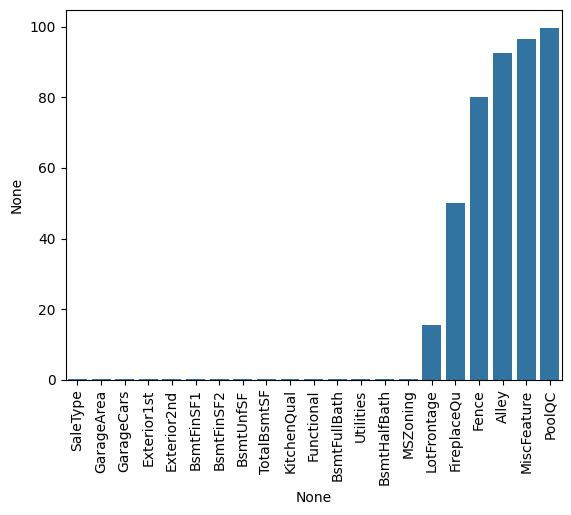

In [83]:
percent_nan_test = percent_missing(df_test)
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

In [85]:
#Поскольку в данных столбцах большое количество строк имеют пропущенные значения, то просто удаляем данные столбцы
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

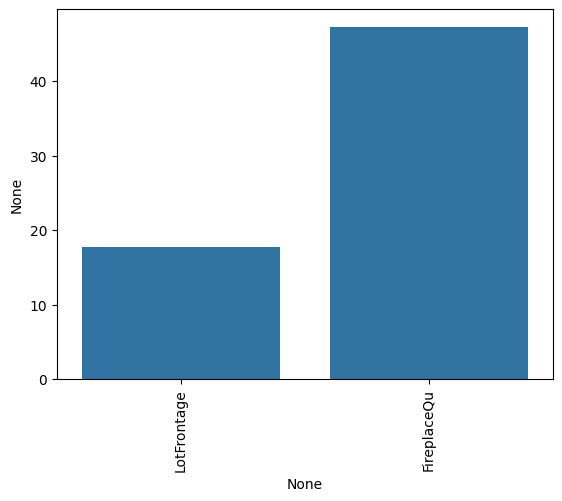

In [100]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

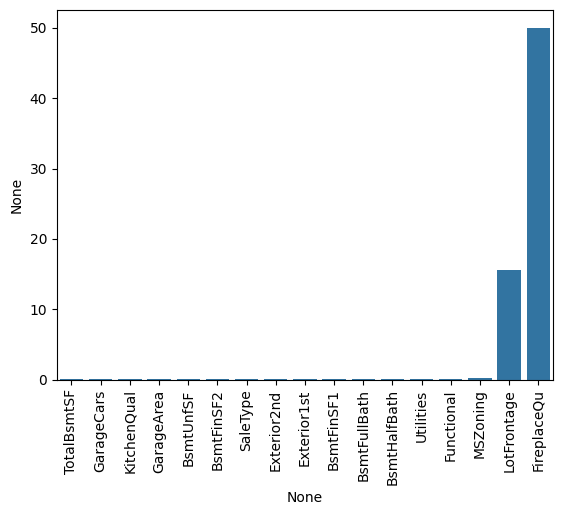

In [101]:
percent_nan_test = percent_missing(df_test)
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

In [102]:
#Для данного столбца указываем значение None
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna("None")
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna("None")

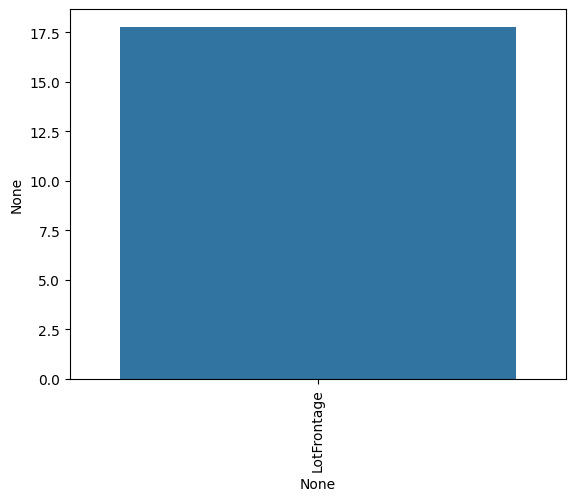

In [104]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

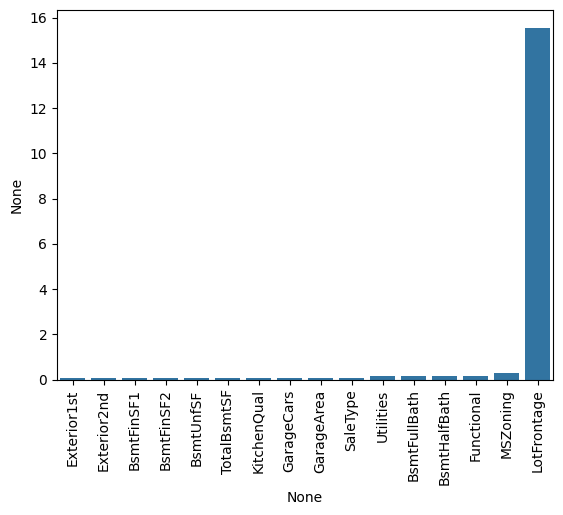

In [105]:
percent_nan_test = percent_missing(df_test)
sns.barplot(x=percent_nan_test.index,y=percent_nan_test)
plt.xticks(rotation=90);

In [106]:
#Для восстановления значения LotFrontage посчитаем среднее значение LotFrontage для каждого райнона (Neighborhood)
#Данное полученное значение можно будет вставить в столбец LotFrontage
df_train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [109]:
df_test['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt',
       'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes',
       'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr',
       'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV',
       'Veenker'], dtype=object)

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

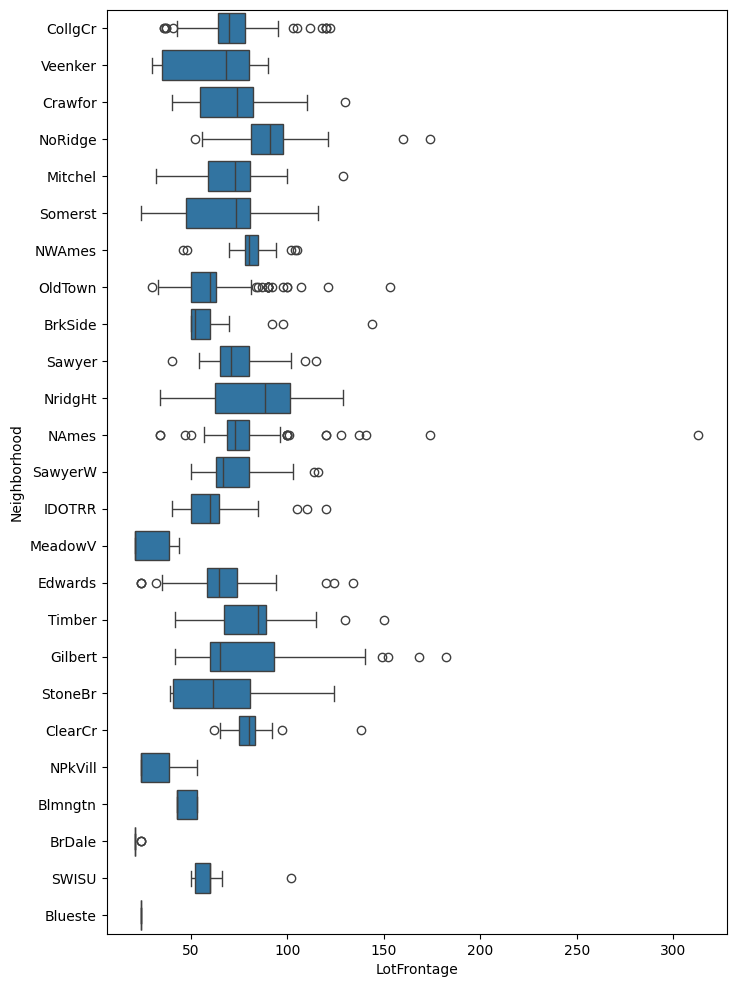

In [110]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=df_train,orient='h')

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

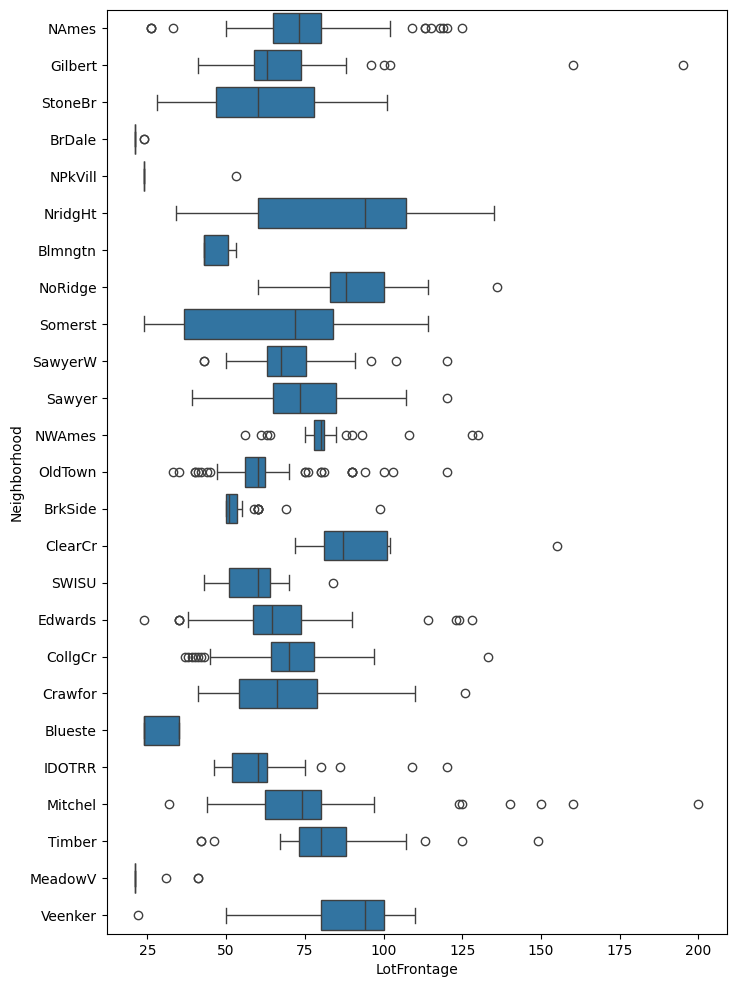

In [112]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=df_test,orient='h')

In [113]:
#Группировка столбца Neighborhood
df_train.groupby('Neighborhood')['LotFrontage']

In [114]:
df_test.groupby('Neighborhood')['LotFrontage']

In [117]:
#Вывод среднего значения LotFrontage для каждого райнона
df_train.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [119]:
df_test.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    46.333333
Blueste    28.125000
BrDale     21.428571
BrkSide    53.795455
ClearCr    96.857143
CollgCr    70.872340
Crawfor    68.142857
Edwards    65.511628
Gilbert    69.725806
IDOTRR     62.075472
MeadowV    23.777778
Mitchel    78.518519
NAmes      73.978836
NPkVill    26.071429
NWAmes     81.775000
NoRidge    91.238095
NridgHt    86.195402
OldTown    60.858333
SWISU      59.238095
Sawyer     74.660000
SawyerW    69.928571
Somerst    64.440476
StoneBr    61.769231
Timber     82.296296
Veenker    81.555556
Name: LotFrontage, dtype: float64

In [120]:
df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1457, dtype: float64

In [121]:
df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [130]:
#Заполняем колонку LotFrontage для тех строк, у которых отсутствует значение, средним значением
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [132]:
percent_nan = percent_missing(df_train)
percent_nan_test = percent_missing(df_test)

In [134]:
#Для тренировочных данных нет пропущенных значений, а в тестовых осталось
print(percent_nan)
print(percent_nan_test)

Series([], dtype: float64)
Exterior1st     0.06854
Exterior2nd     0.06854
BsmtFinSF1      0.06854
BsmtFinSF2      0.06854
BsmtUnfSF       0.06854
TotalBsmtSF     0.06854
KitchenQual     0.06854
GarageCars      0.06854
GarageArea      0.06854
SaleType        0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64


In [136]:
#Выводим статистические данные о данных столбцах
df_test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
count,1458.000000,1458.000000,1458.000000,1458.000000
mean,439.203704,52.619342,554.294925,1046.117970
std,455.268042,176.753926,437.260486,442.898624
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,219.250000,784.000000
50%,350.500000,0.000000,460.000000,988.000000
75%,753.500000,0.000000,797.750000,1305.000000
max,4010.000000,1526.000000,2140.000000,5095.000000


In [138]:
#Указываем значение 0 для данных столбцов
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

In [140]:
percent_nan_test = percent_missing(df_test)
percent_nan_test

Exterior1st     0.06854
Exterior2nd     0.06854
KitchenQual     0.06854
GarageCars      0.06854
GarageArea      0.06854
SaleType        0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64

In [142]:
#Если для строк, у которых не указано значение в столбце SaleType, то можем указать значение Other
df_test['SaleType'] = df_test['SaleType'].fillna('Oth')
percent_nan_test = percent_missing(df_test)
percent_nan_test

Exterior1st     0.06854
Exterior2nd     0.06854
KitchenQual     0.06854
GarageCars      0.06854
GarageArea      0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64

In [144]:
df_test[['GarageArea']].describe()

,GarageArea
count,1458.000000
mean,472.768861
std,217.048611
min,0.000000
25%,318.000000
50%,480.000000
75%,576.000000
max,1488.000000


In [146]:
df_test[df_test['GarageArea'].isnull()][['GarageCars', 'GarageArea', 'GarageQual']]

,GarageCars,GarageArea,GarageQual
1116,NaN,NaN,None


In [148]:
df_test[df_test['GarageArea']==0][['GarageCars', 'GarageArea', 'GarageQual']]

,GarageCars,GarageArea,GarageQual
53,0.0,0.0,None
71,0.0,0.0,None
79,0.0,0.0,None
92,0.0,0.0,None
96,0.0,0.0,None
...,...,...,...
1433,0.0,0.0,None
1449,0.0,0.0,None
1453,0.0,0.0,None
1454,0.0,0.0,None


In [150]:
#Тут указывем значение 0, так как для этих домов нет гаража, следовательно, площадь гаража и количество машин в гараже равна 0
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)

In [152]:
percent_nan_test = percent_missing(df_test)
percent_nan_test

Exterior1st     0.06854
Exterior2nd     0.06854
KitchenQual     0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64

In [154]:
#Для переменной KitchenQual указывем значение TA, так как их большое количетсво и это никак не повлияет на качество будущей модели
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')
percent_nan_test = percent_missing(df_test)
percent_nan_test

Exterior1st     0.06854
Exterior2nd     0.06854
Utilities       0.13708
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
Functional      0.13708
MSZoning        0.27416
dtype: float64

In [156]:
df_test[['BsmtFullBath', 'BsmtHalfBath']].describe()

,BsmtFullBath,BsmtHalfBath
count,1457.000000,1457.000000
mean,0.434454,0.065202
std,0.530648,0.252468
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,3.000000,2.000000


In [158]:
#Для данных столбцов указываем значение 0
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)

In [160]:
percent_nan_test = percent_missing(df_test)
percent_nan_test

Exterior1st    0.06854
Exterior2nd    0.06854
Utilities      0.13708
Functional     0.13708
MSZoning       0.27416
dtype: float64

In [162]:
#Для этих указыааем значение Other
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('Other')
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('Other')

In [164]:
percent_nan_test = percent_missing(df_test)
percent_nan_test

Utilities     0.13708
Functional    0.13708
MSZoning      0.27416
dtype: float64

In [166]:
#Туту указываем значение AllPub, поскольку в тестовом датасете для всех строк в тестовом датасете значение столбца
#Utilities равен AllPub
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')
percent_nan_test = percent_missing(df_test)
percent_nan_test

Functional    0.13708
MSZoning      0.27416
dtype: float64

In [168]:
#Для столбца Functional указываем значение Typ
df_test['Functional'] = df_test['Functional'].fillna('Typ')
percent_nan_test = percent_missing(df_test)
percent_nan_test

MSZoning    0.27416
dtype: float64

In [170]:
#Для MSZoning RL
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')
percent_nan_test = percent_missing(df_test)
percent_nan_test

Series([], dtype: float64)

### 2. Кодировка категориальных переменных методом dummy-переменных

In [173]:
#Установка столбца Id в качестве индекса
df_train = df_train.set_index('Id')

In [175]:
df_test = df_test.set_index('Id')

In [177]:
#Сохранение значений столбца SalePrice в переменную y и удаление столбца SalePrice из df_train
y = df_train['SalePrice']
df_train = df_train.drop('SalePrice', axis=1)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal


In [179]:
#Объединение тренировочного и тестового набора данных в один DataFrame для формирования dummy-переменных
df_final = pd.concat([df_train, df_test], axis=0)
df_final

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [181]:
# Конвертация в строку
df_final['MSSubClass'] = df_final['MSSubClass'].apply(str)

In [183]:
#Отбор категориальных переменных
df_final.select_dtypes(include='object')

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2916,160,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,TA,Typ,None,CarPort,Unf,TA,TA,Y,WD,Abnorml
2917,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Abnorml


In [185]:
#Сохранения столбцов с числовыми значениями и категориальные столбцы в переменную df_nums и df_objs соответственно
df_nums = df_final.select_dtypes(exclude='object')
df_objs = df_final.select_dtypes(include='object')

In [187]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 1 to 2919
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2916 non-null   float64
 1   LotArea        2916 non-null   int64  
 2   OverallQual    2916 non-null   int64  
 3   OverallCond    2916 non-null   int64  
 4   YearBuilt      2916 non-null   int64  
 5   YearRemodAdd   2916 non-null   int64  
 6   MasVnrArea     2916 non-null   float64
 7   BsmtFinSF1     2916 non-null   float64
 8   BsmtFinSF2     2916 non-null   float64
 9   BsmtUnfSF      2916 non-null   float64
 10  TotalBsmtSF    2916 non-null   float64
 11  1stFlrSF       2916 non-null   int64  
 12  2ndFlrSF       2916 non-null   int64  
 13  LowQualFinSF   2916 non-null   int64  
 14  GrLivArea      2916 non-null   int64  
 15  BsmtFullBath   2916 non-null   float64
 16  BsmtHalfBath   2916 non-null   float64
 17  FullBath       2916 non-null   int64  
 18  HalfBath     

In [189]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 1 to 2919
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2916 non-null   object
 1   MSZoning       2916 non-null   object
 2   Street         2916 non-null   object
 3   LotShape       2916 non-null   object
 4   LandContour    2916 non-null   object
 5   Utilities      2916 non-null   object
 6   LotConfig      2916 non-null   object
 7   LandSlope      2916 non-null   object
 8   Neighborhood   2916 non-null   object
 9   Condition1     2916 non-null   object
 10  Condition2     2916 non-null   object
 11  BldgType       2916 non-null   object
 12  HouseStyle     2916 non-null   object
 13  RoofStyle      2916 non-null   object
 14  RoofMatl       2916 non-null   object
 15  Exterior1st    2916 non-null   object
 16  Exterior2nd    2916 non-null   object
 17  MasVnrType     2916 non-null   object
 18  ExterQual      2916 non-null   ob

In [191]:
#Формирование dummy-переменных
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [193]:
df_objs

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2916,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2917,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [195]:
#Объединение числовых и категориальных столбцов
final_df = pd.concat([df_nums,df_objs],axis=1)

In [197]:
final_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,False,False,False,False,True,False,False,False,True,False
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,False,False,False,False,True,False,False,False,True,False
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,False,False,False,False,True,False,False,False,True,False
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,False,False,False,False,True,False,False,False,False,False
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,False,False,False,False,True,False,False,False,True,False
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,False,False,False,False,True,False,False,False,False,False
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


In [199]:
#Разделение данных на тренировочные и тестовые выборки
final_df_train = final_df.iloc[0:1457]
final_df_test = final_df.iloc[1457:]

In [201]:
final_df_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,False,False,False,False,True,False,False,False,True,False
1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,False,False,False,False,True,False,False,False,True,False
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,False,False,False,False,True,False,False,False,False,False
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


### 3. Построение и обучение модели

In [204]:
#Разделение тренировочного датасета на обучающую и валидационную выборки
from sklearn.model_selection import train_test_split
X = final_df_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

In [206]:
#Стандартизация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [208]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
#Для построения модели выбрана LASSO-регрессия
from sklearn.linear_model import Lasso
model = Lasso()

In [212]:
param_grid = {'alpha':[0.1,1,5,10,50,100]}

In [214]:
#Использование GridSearch для выбора оптимального значения гиперпараметра alpha
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [216]:
#Обучение модели
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+11, tolerance: 6.993e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e+11, tolerance: 6.370e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+11, toler

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [218]:
#Вывод лучшего оптимального гиперпараметра. Получили 100
grid_model.best_params_

{'alpha': 100}

In [220]:
#Предсказания значений цены дома для валидационной выборки
y_pred = grid_model.predict(X_test)

In [222]:
#Расчет метрики RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

26057.795846472596

In [224]:
#Расчет метрики коэффициента детерминации. Получили значение 0.89, что говорит о том, что модель хорошо описывает данные
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8971683523423017

In [226]:
X_final = scaler.transform(final_df_test)

In [228]:
#Предсказания значений цены дома для тестовой выборки
y_pred_test = grid_model.predict(X_final)

In [230]:
y_pred_test

array([105726.63995328, 162508.04223299, 189086.74176728, ...,
       178881.34269509, 104714.89061183, 220504.89862427])

In [2037]:
id = np.array(df_test.index)

In [2045]:
#Сохранение результатов предсказанных значений в DataFrame
df1 = {'Id': id, 'SalePrice': y_pred_test}
df_result = pd.DataFrame(df1)
df_result

,Id,SalePrice
0,1461,105726.639953
1,1462,162508.042233
2,1463,189086.741767
3,1464,195157.401373
4,1465,209060.914954
...,...,...
1454,2915,78082.423541
1455,2916,68118.901051
1456,2917,178881.342695
1457,2918,104714.890612


In [2047]:
#Сохранение резульатов в csv-file для отправки в kaggle
df_result.to_csv('sample_submission.csv', index=False)

### После отправки данного csv файла в kaggle, получил точность 0.15548